In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [8]:
zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in zero_cols:
    df[col].replace( 0, np.nan, inplace = True )

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

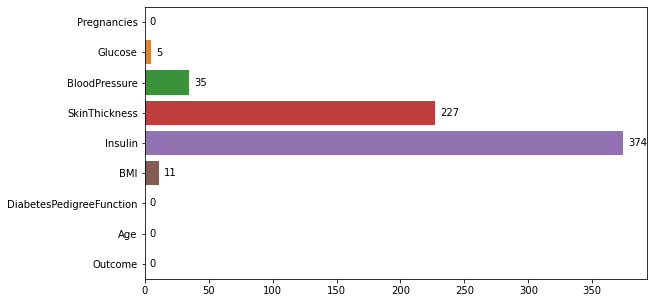

In [10]:
plt.figure(figsize = (9,5))
ax = sns.barplot(x = df.isnull().sum(), y = df.columns, orient = 'h')

for t in ax.patches:
    ax.annotate(text = f"{t.get_width():.0f}", 
                xy = (t.get_width(), t.get_y() + t.get_height()/2 ),
                xytext = (5, 0), textcoords = 'offset points', 
                ha = "left", va = "center",
               )
plt.grid(False)
plt.show()

In [11]:
for col in zero_cols:
    df[col].replace(np.nan, round(df[col].mean(), 3), inplace=True)
    
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000,35.000,155.548,33.600,0.627,50,1
1,1,85.0,66.000,29.000,155.548,26.600,0.351,31,0
2,8,183.0,64.000,29.153,155.548,23.300,0.672,32,1
3,1,89.0,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.0,40.000,35.000,168.000,43.100,2.288,33,1
5,5,116.0,74.000,29.153,155.548,25.600,0.201,30,0
6,3,78.0,50.000,32.000,88.000,31.000,0.248,26,1
7,10,115.0,72.405,29.153,155.548,35.300,0.134,29,0
8,2,197.0,70.000,45.000,543.000,30.500,0.158,53,1
9,8,125.0,96.000,29.153,155.548,32.457,0.232,54,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686764,72.405176,29.153296,155.548115,32.457457,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202500,29.153000,155.548000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


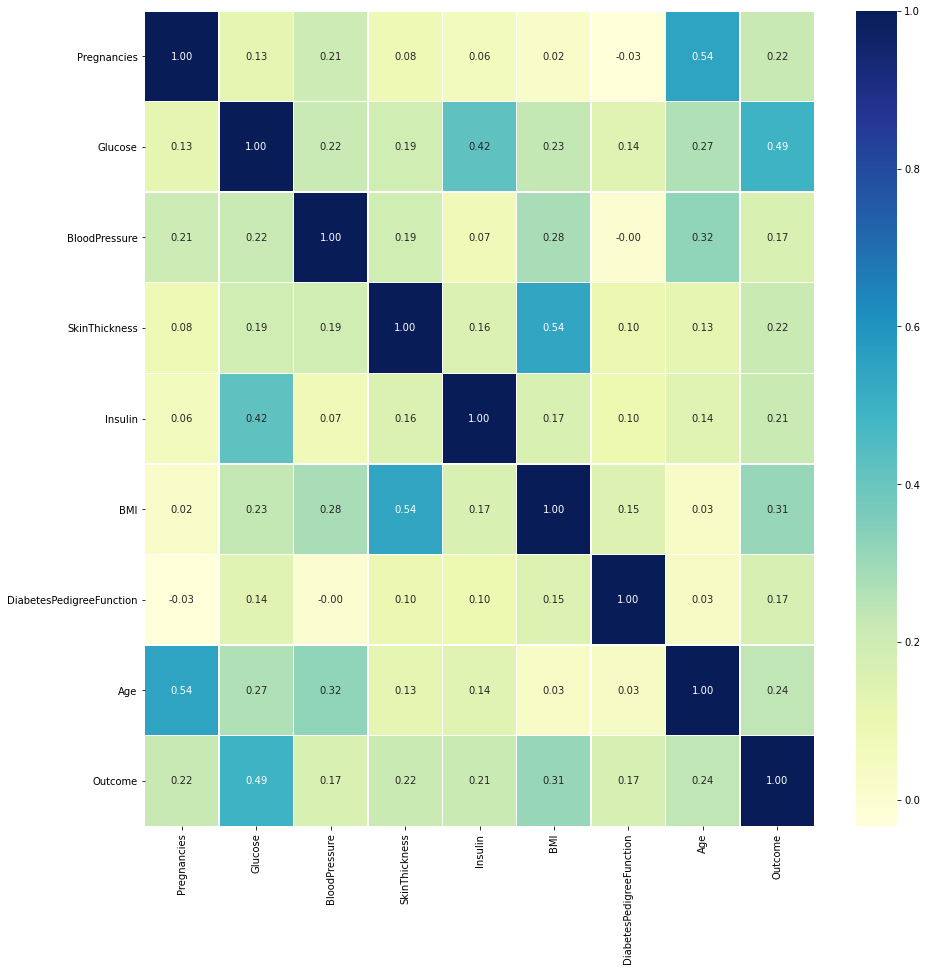

In [13]:
cor_ = df.corr()
fig , ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap( cor_, annot = True, linewidth = 0.5, fmt = ".2f", cmap = "YlGnBu")

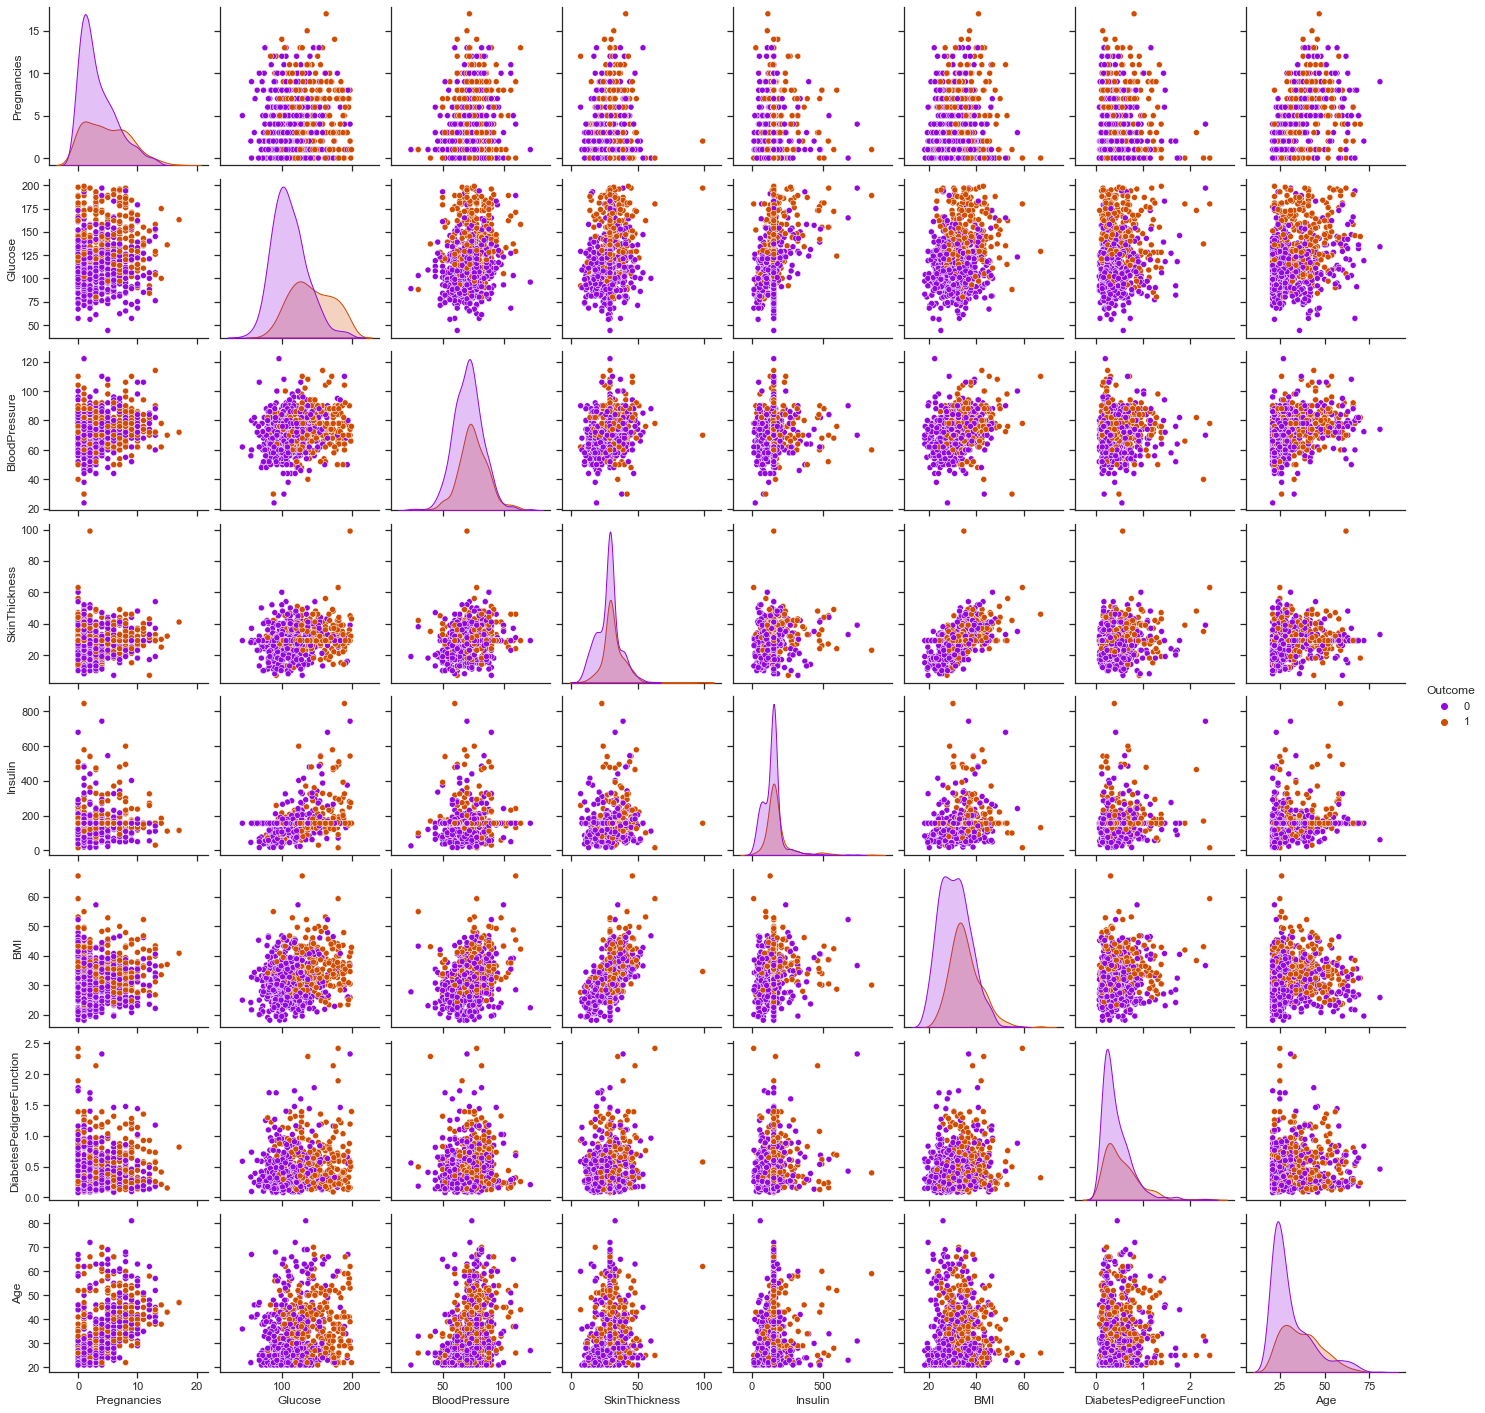

In [14]:
sns.set( style = "ticks", color_codes = True )
sns.pairplot(df, hue = 'Outcome', palette='gnuplot' )

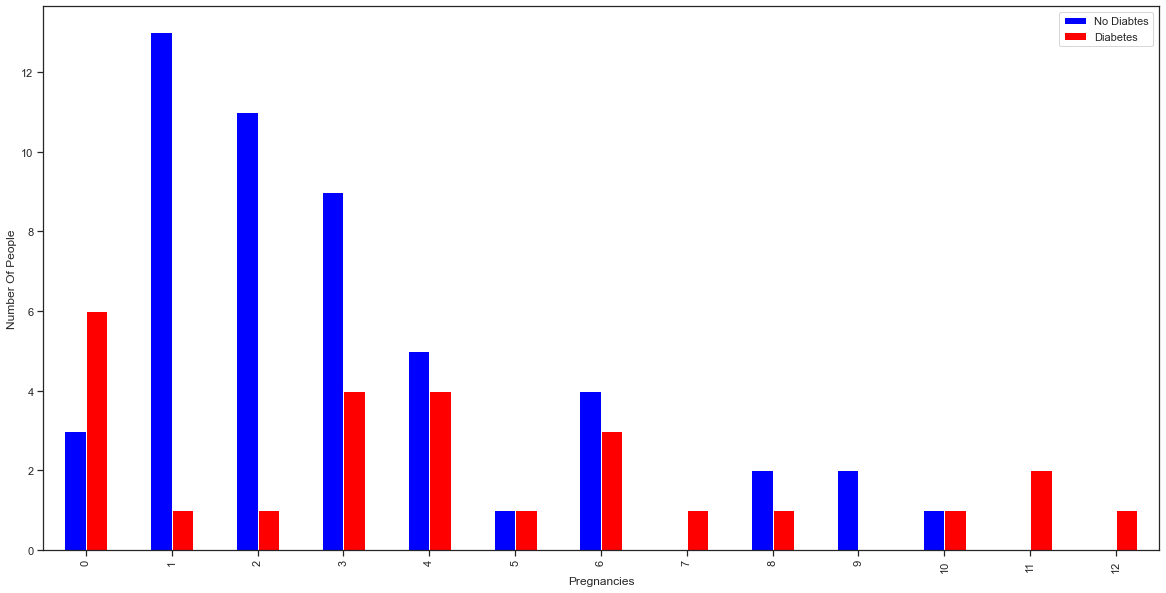

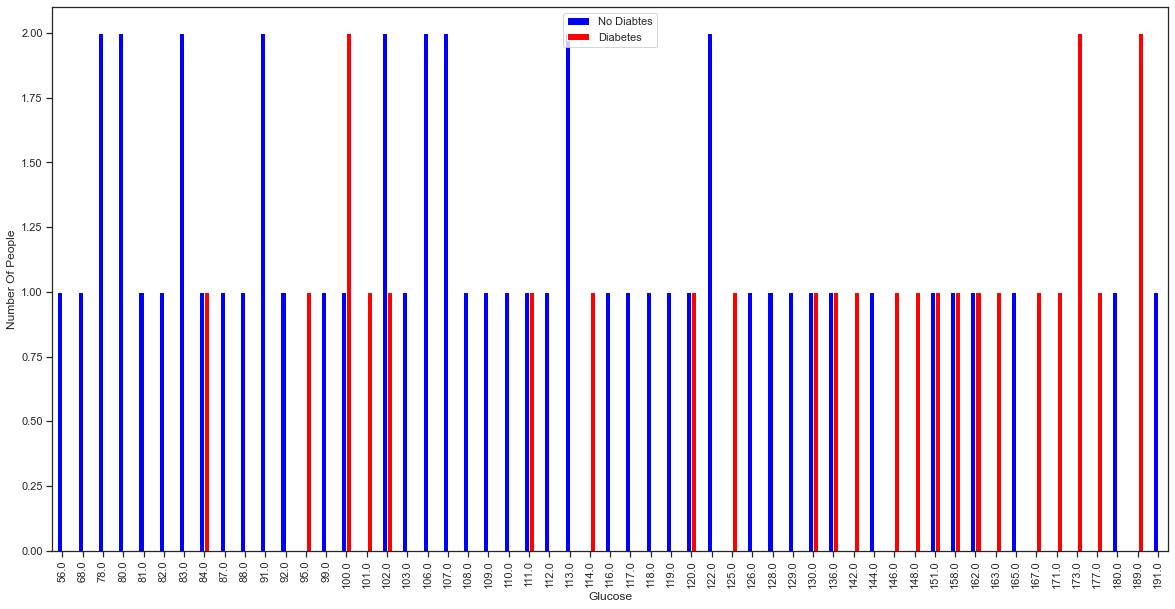

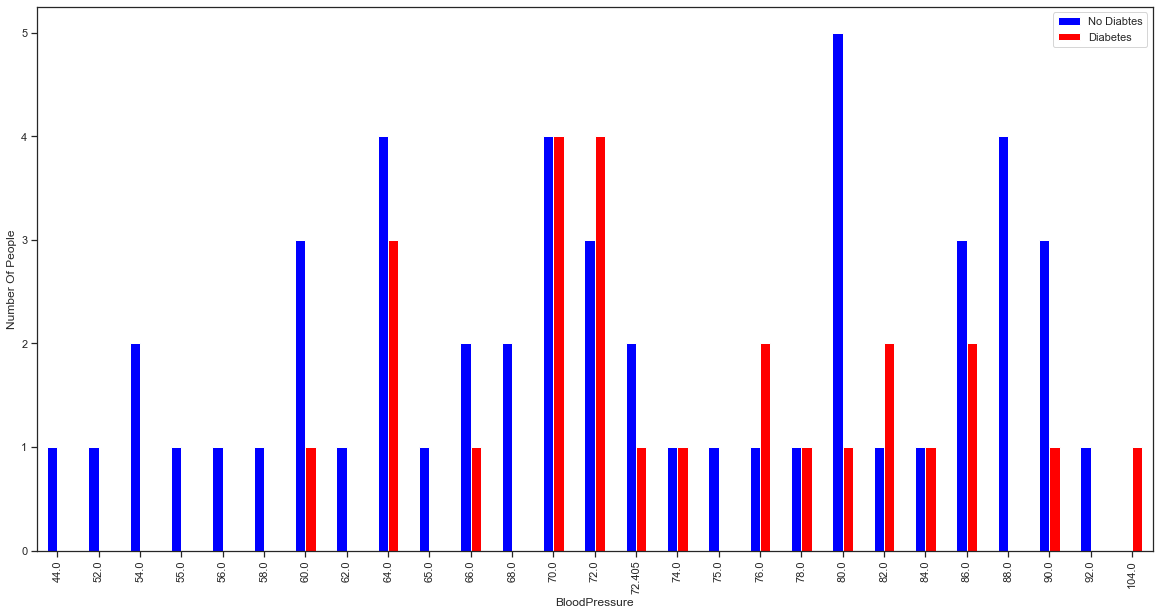

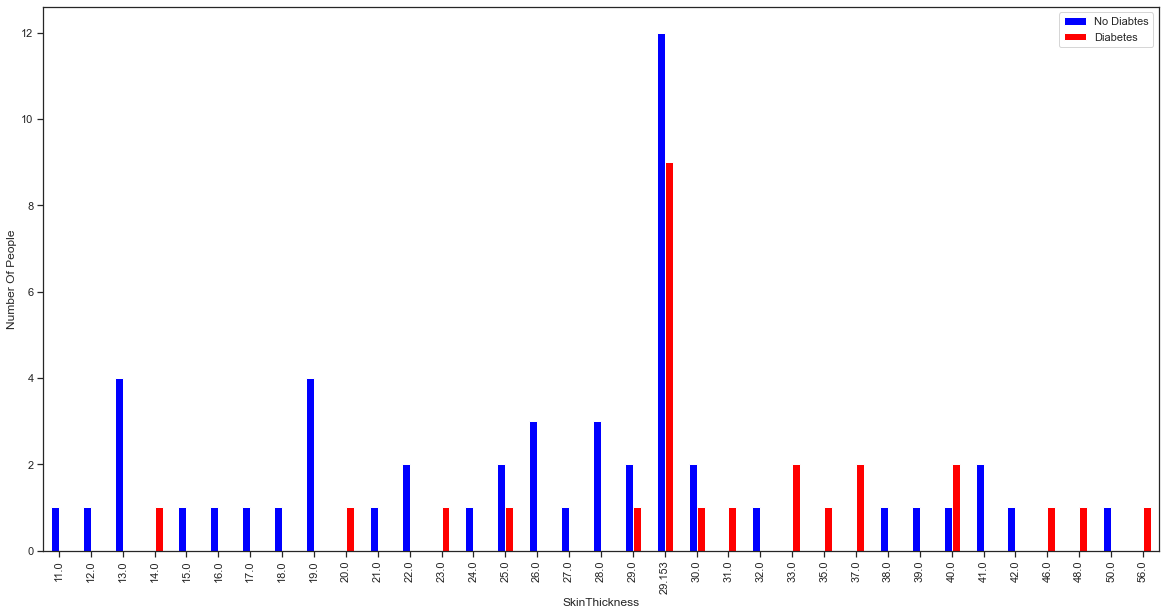

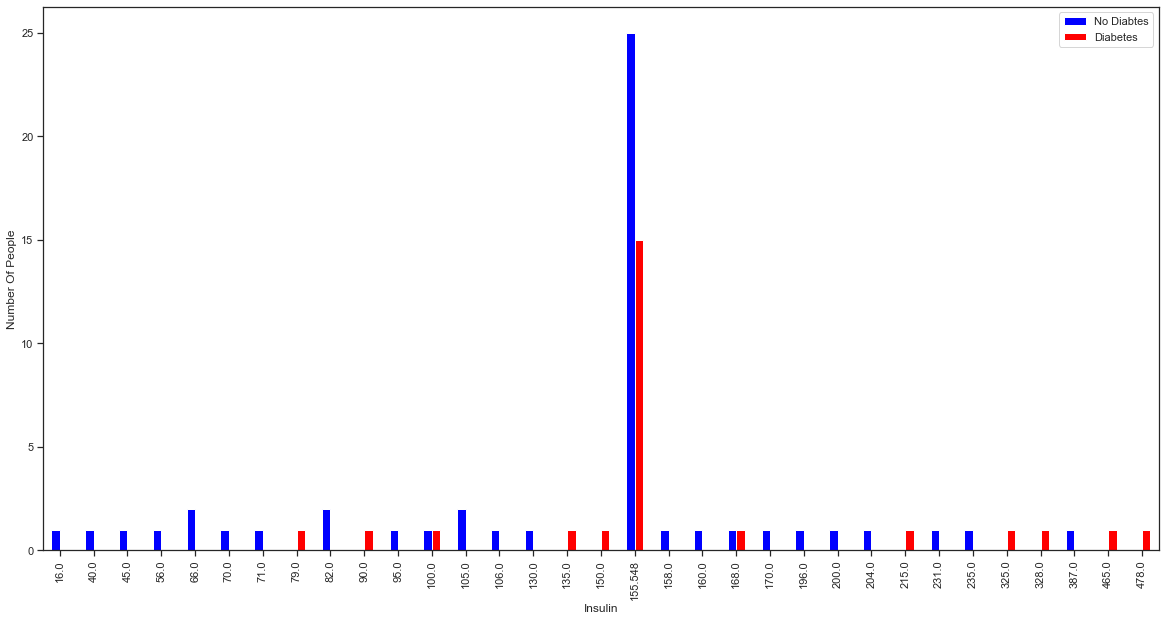

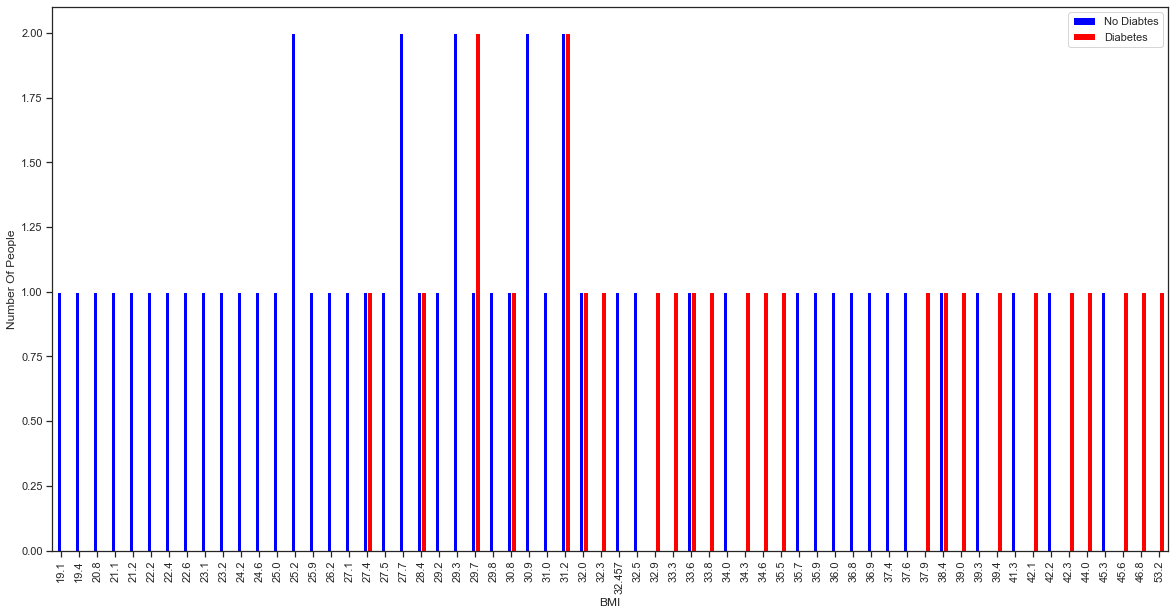

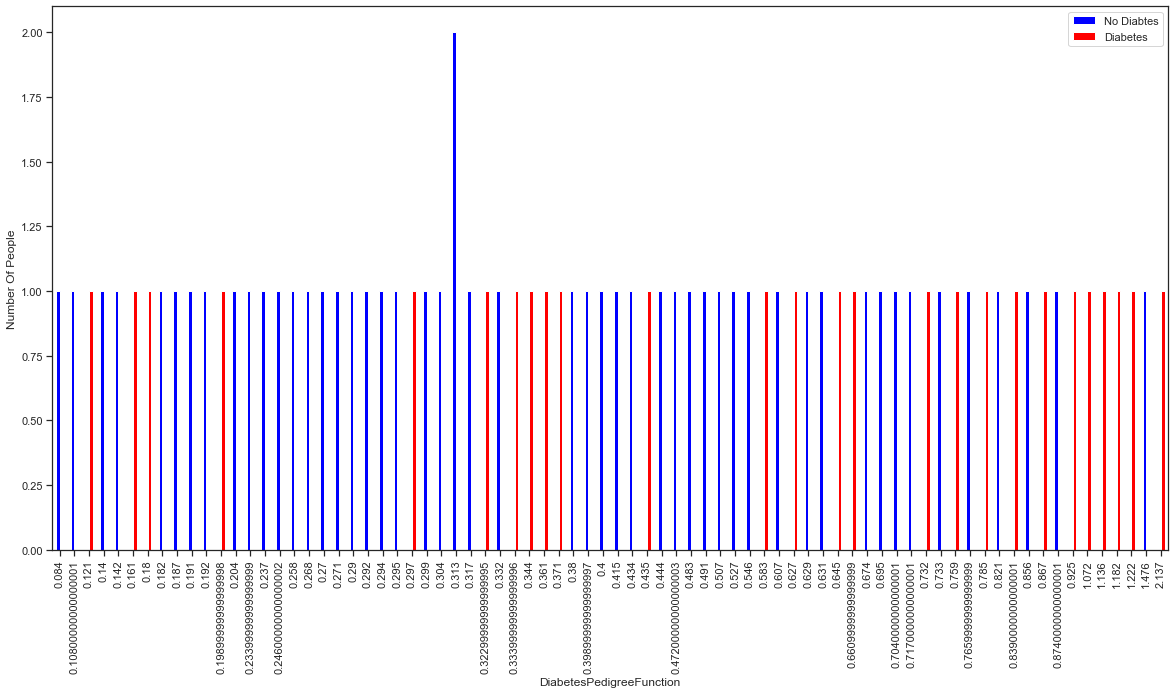

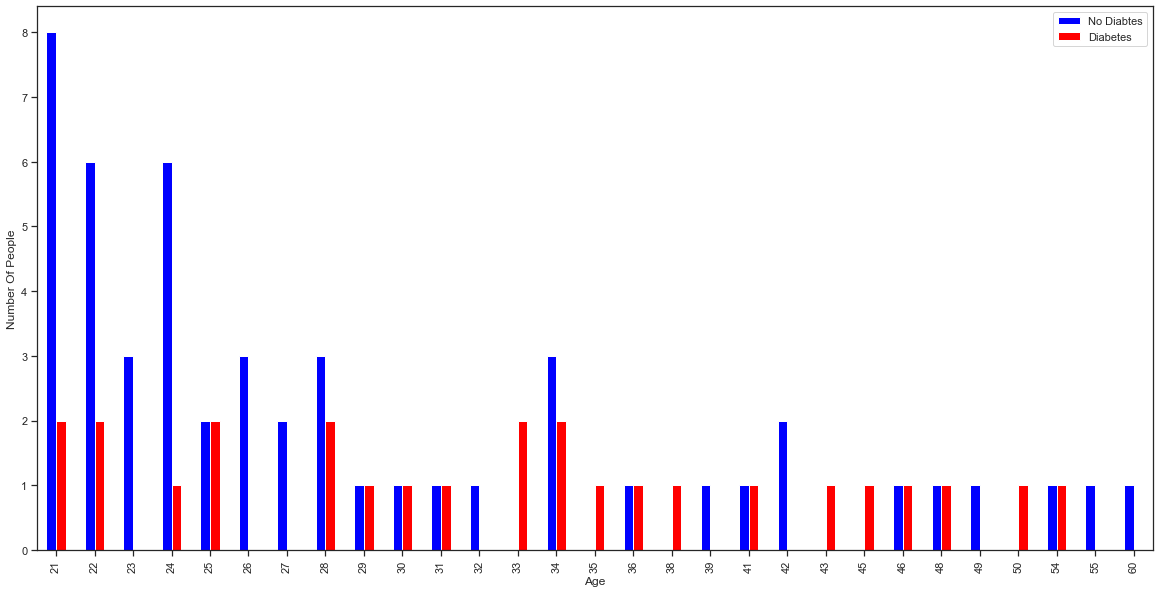

In [15]:
cols = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i in cols:
    pd.crosstab(df[i][::10], df['Outcome']).plot( kind = "bar", figsize=(20, 10), color=["blue","red"])
    plt.ylabel('Number Of People')
    plt.legend(['No Diabtes', 'Diabetes'])

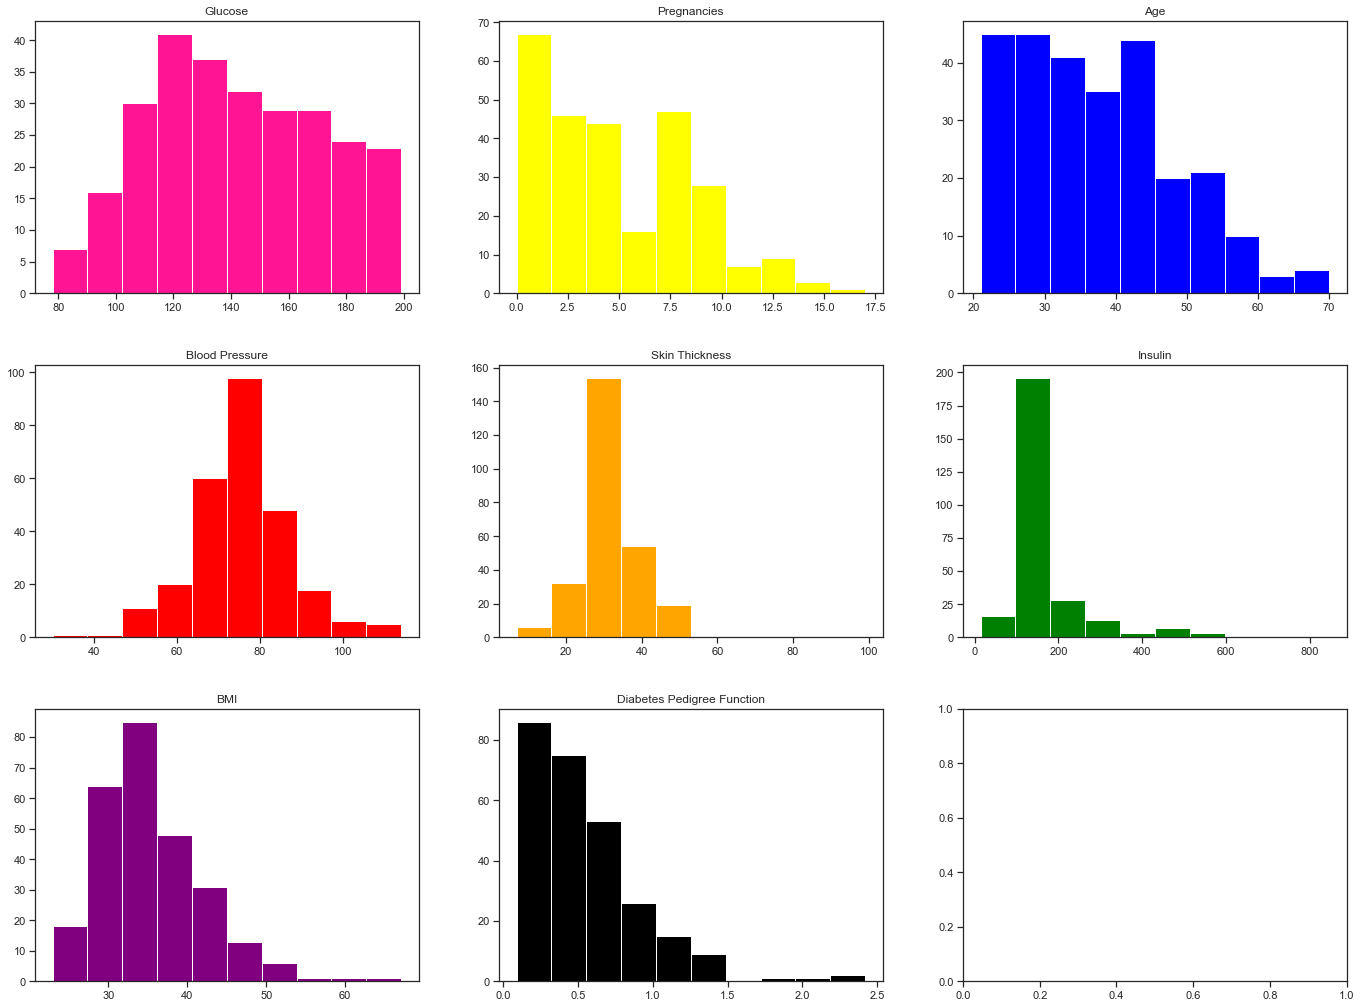

In [16]:
fig, ax = plt.subplots( nrows = 3, ncols = 3, figsize = (20, 15))
fig.tight_layout(pad = 4.0)
ax[0, 0].set_title('Glucose')
ax[0, 0].hist(df.Glucose[df.Outcome == 1], color = "deeppink");
ax[0, 1].set_title('Pregnancies')
ax[0, 1].hist(df.Pregnancies[df.Outcome == 1], color = "yellow");
ax[0, 2].set_title('Age')
ax[0, 2].hist(df.Age[df.Outcome == 1], color = "blue");
ax[1, 0].set_title('Blood Pressure')
ax[1, 0].hist(df.BloodPressure[df.Outcome == 1], color = "red");
ax[1, 1].set_title('Skin Thickness')
ax[1, 1].hist(df.SkinThickness[df.Outcome == 1], color = "orange");
ax[1, 2].set_title('Insulin')
ax[1, 2].hist(df.Insulin[df.Outcome == 1], color = "green");
ax[2, 0].set_title('BMI')
ax[2, 0].hist(df.BMI[df.Outcome == 1], color = "purple");
ax[2, 1].set_title('Diabetes Pedigree Function')
ax[2, 1].hist(df.DiabetesPedigreeFunction[df.Outcome == 1], color = "black");

In [17]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
pd.DataFrame(X_train, columns=df.columns[:-1]).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,7.666687e-17,-4.314771e-17,-2.422962e-17,-3.006101e-17,-3.418366e-16,-3.536802e-16,1.412189e-16,-3.435544e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.130523e+00,-2.588180e+00,-3.990733e+00,-2.468892e+00,-1.621349e+00,-2.042377e+00,-1.162210e+00,-1.035940e+00
25%,-8.284601e-01,-7.263231e-01,-6.820429e-01,-5.656801e-01,-4.476707e-01,-7.256145e-01,-6.764304e-01,-7.749361e-01
50%,-2.243336e-01,-1.278692e-01,-2.030480e-02,4.727304e-02,7.394088e-03,-5.099927e-02,-2.872124e-01,-3.399290e-01
75%,6.818561e-01,5.703271e-01,6.414333e-01,3.859258e-01,7.394088e-03,5.803252e-01,4.295726e-01,6.170866e-01
max,4.004552e+00,2.565173e+00,4.115558e+00,4.073399e+00,7.952181e+00,5.014027e+00,5.796175e+00,4.184145e+00


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 6, metric = 'minkowski', p = 2 )
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7532467532467533

In [22]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression( C = 0.01 )
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.7597402597402597

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 800, criterion = "entropy", random_state = 30)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7727272727272727

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 20)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7402597402597403

In [25]:
from sklearn.svm import SVC
lsvm = SVC(kernel="linear", C = 0.01, random_state=0)
lsvm.fit(X_train, y_train)
lsvm.score(X_test, y_test)

0.7922077922077922

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.7467532467532467

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, verbosity=0)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.7077922077922078

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

from warnings import filterwarnings
filterwarnings("ignore")

In [29]:
def display_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt="d" )
    plt.title(f"Accuracy: {accuracy_score(y_test, y_pred):0.4f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



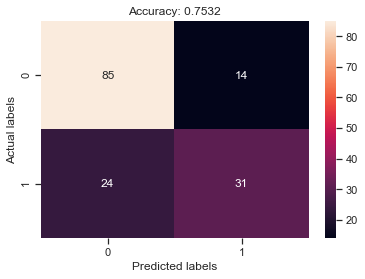

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



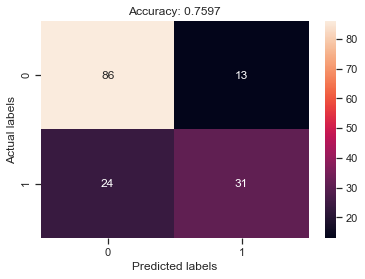

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



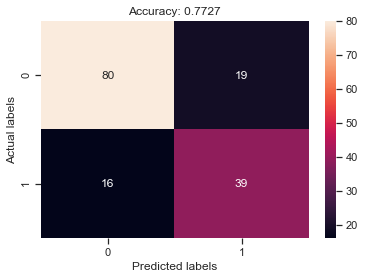

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



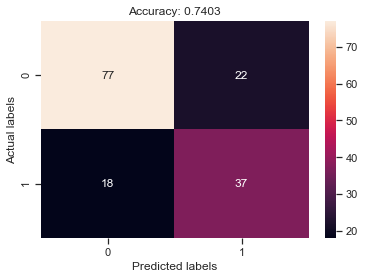

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        99
           1       0.77      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



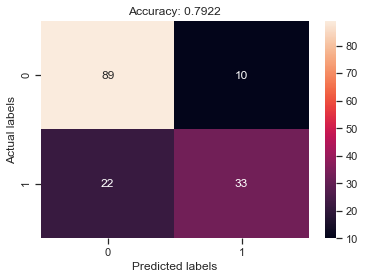

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



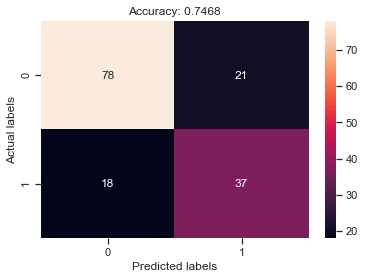

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



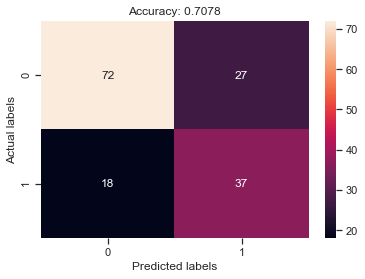

In [30]:
knn_score = display_report(y_test, knn.predict(X_test))
logr_score = display_report(y_test, logr.predict(X_test))
rfc_score = display_report(y_test, rfc.predict(X_test))
dtc_score = display_report(y_test, dtc.predict(X_test))
lsvm_score = display_report(y_test, lsvm.predict(X_test))
gnb_score = display_report(y_test, gnb.predict(X_test))
xgb_score = display_report(y_test, xgb.predict(X_test))

In [31]:
models_final = pd.DataFrame(
    {
      'Models':["KNN", "Logistic Regression", "Random Forest", "Decision Tree", "SVM", "Gaussian NB", "XG Boost"],
        
      'Accuracy':[knn_score, logr_score, rfc_score, dtc_score, lsvm_score, gnb_score, xgb_score]
    }
)
models_final.sort_values(by = "Accuracy", ascending = False, inplace = True, ignore_index = True)
models_final

,Models,Accuracy
0,SVM,0.792208
1,Random Forest,0.772727
2,Logistic Regression,0.759740
3,KNN,0.753247
4,Gaussian NB,0.746753
5,Decision Tree,0.740260
6,XG Boost,0.707792


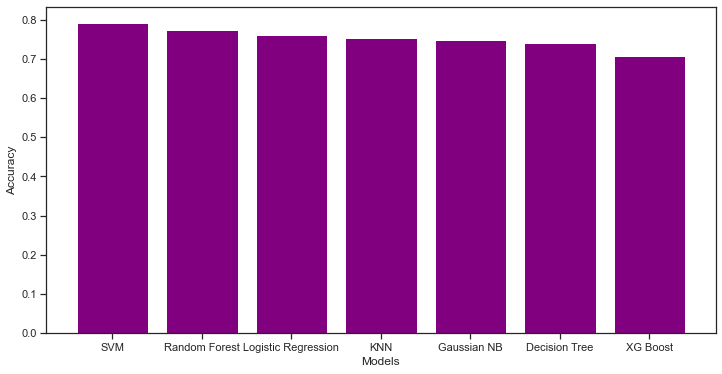

In [32]:
plt.figure(figsize = (12, 6))
plt.bar(x = models_final['Models'], height = models_final['Accuracy'], color = "purple")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

In [33]:
logr_grid = {  'C': np.logspace(-5, 10, 15),
               'solver': ["liblinear", "saga", "sag", "newton-cg"],
               'penalty': ['l2']
            }

gs_logr = GridSearchCV (   logr,
                           param_grid = logr_grid,
                           cv=5,
                           error_score = 0,
                           scoring = 'accuracy'
                      )


gs_logr.fit(X_train,y_train)


print("Tuned Logistic Regression Parameters: {}".format(gs_logr.best_params_)) 
print("Best score is {}".format(gs_logr.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.19306977288832497, 'penalty': 'l2', 'solver': 'saga'}
Best score is 0.7655071304811409


In [34]:
dtc_grid = {
    'max_depth': np.linspace(1, 32, 32, endpoint = True),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10], 
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
}

gs_dtc = GridSearchCV( dtc, param_grid = dtc_grid, cv = 10, n_jobs = -1, verbose = 1)

gs_dtc.fit(X_train, y_train)


print("Tuned Decision Tree Parameters: {}".format(gs_dtc.best_params_)) 
print("Best score is {}".format(gs_dtc.best_score_))

Fitting 10 folds for each of 17280 candidates, totalling 172800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 8200 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 40200 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 85000 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 142600 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 172800 out of 172800 | elapsed:  1.2min finished


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6.0, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score is 0.7753040719196193


In [35]:
knn_grid = {
              'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10],
              'leaf_size':[1, 2, 3, 4, 5, 6, 7, 9],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'n_jobs':[-1]
           }

gs_knn = GridSearchCV(knn, param_grid = knn_grid, n_jobs = 1 )

gs_knn.fit(X_train, y_train)

print("Tuned KNN Parameters: {}".format(gs_knn.best_params_))
print("Best score is: {}".format(gs_knn.best_score_))

Tuned KNN Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Best score is: 0.7557377049180328


In [36]:
xgb_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

gs_xgb = GridSearchCV(estimator = xgb, param_grid = xgb_grid, cv = 5, n_jobs = -1, verbose = 1)

gs_xgb.fit(X_train, y_train)


print("Tuned XG Boost Parameters: {}".format(gs_xgb.best_params_)) 
print("Best score is {}".format(gs_xgb.best_score_))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.5min finished


Tuned XG Boost Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}
Best score is 0.7818339330934293


In [37]:
lsvm_grid = {  'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
  
gs_lsvm = GridSearchCV( lsvm, param_grid = lsvm_grid, refit = True, verbose = 3)

gs_lsvm.fit(X_train, y_train)

print("Tuned SVM Parameters: {}".format(gs_lsvm.best_params_)) 
print("Best score is {}".format(gs_lsvm.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.748, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.748, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   47.4s finished


In [38]:
y_hat = lsvm.predict(X_test)
print(y_hat)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [39]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]


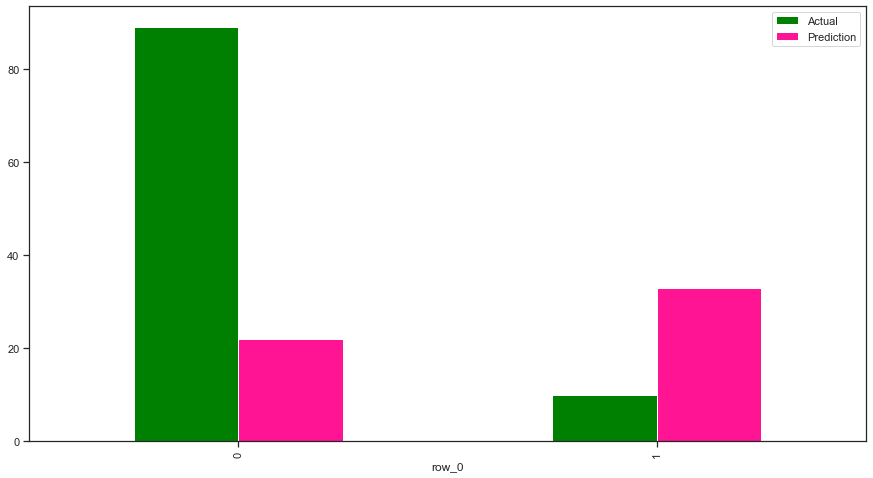

In [40]:
pd.crosstab(y_hat, y_test).plot( kind = "bar", figsize=(15, 8), color=["green","deeppink"])
plt.legend(['Actual', 'Prediction'])